# Homework 5 (100 Points)

## Exercise 1 (55 pts)

For this exercise we’ll be working with two years of the bicycle sharing systems for New York City (Citibike). The dataset contains daily bike trip counts, along with daily measurements on environmental and seasonal information that may affect the bikesharing.

Here’s information on what the variables mean.

- trips - daily total number of bike trips taken (all stations)
- precipitation - daily inches of rain
- snow_depth - daily inches of snow. Accoding to NOAA "Determine the depth of the new and old snow remaining on the ground at observation time".
- snowfall - according to NOAA "Measure and record the snowfall (snow, ice pellets ) since the previous snowfall observation (24 hours)."
- max_temperature - daily maximum temperature in Farenheit (highest temperature reached)
- min_temperature - daily minimum temperature in Farenheit (lowest temperature reached)
- average_wind_speed - measured hourly in mph and averaged for daily value
- year 
- holiday
    - True
    - False
- stations in service - docking stations working per day
- weekday
    - True
    - False
- weekday_non_holiday
    - True
    - False

More details on snow measurements [here](https://www.weather.gov/gsp/snow)

In [1]:
# All the libraries that we will need
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Part 1: Data pre-processing (7 pts)

Let's start by loading and pre-processing our dataset.

a) Load the `bikes` dataset into a dataframe called `bikes`. Take care of any missing values appropriately. [2pts]

In [2]:
# your code here

# Process the data 
def process(df):
    df["holiday"] = df["holiday"].apply(lambda row: 1 if row == True else 0)
    df["weekday"] = df["weekday"].apply(lambda row: 1 if row == True else 0)
    
    df["weekday_non_holiday"] = df["weekday_non_holiday"].apply(lambda row: 1 if row == True else 0)

    mean_wind = df["average_wind_speed"].mean()
    df["average_wind_speed"].fillna(mean_wind, inplace=True)

bikes = pd.read_csv("./citibike.csv")
process(bikes)
bikes.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,0,329,1,1
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,0,329,1,1
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,0,329,0,0
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,0,329,0,0
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,0,329,1,1


b) Separate your dataset into two dataframe. One dataframe should contain the data for weekends and the other one for weekdays [2pt]

In [3]:
# Your code here
bikes_weekday = bikes.groupby("weekday")
bikes_group = [bikes_weekday.get_group(x) for x in bikes_weekday.groups]

# Expected 2 groups 
print(len(bikes_group))

2


In [4]:
# Weekend bike group
weekend = bikes_group[0]
weekend.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
2,29540,0.059055,0.0,0.0,78.08,68.00,3.35540,2013,summer,8,0,329,0,0
3,35253,0.000000,0.0,0.0,80.06,66.02,5.14495,2013,summer,8,0,329,0,0
9,37201,0.000000,0.0,0.0,82.94,69.98,4.92126,2013,summer,8,0,329,0,0
10,33060,0.000000,0.0,0.0,80.96,64.94,2.46063,2013,summer,8,0,329,0,0
16,37285,0.000000,0.0,0.0,84.02,64.04,2.01324,2013,summer,8,0,329,0,0


In [5]:
# Weekday bike group
weekday = bikes_group[1]
weekday.head()

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,year,season,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,20138,0.649606,0.0,0.0,75.92,66.02,2.90802,2013,summer,8,0,329,1,1
1,35792,0.000000,0.0,0.0,82.94,66.92,4.47387,2013,summer,8,0,329,1,1
4,36776,0.000000,0.0,0.0,78.08,62.06,3.35540,2013,summer,8,0,329,1,1
5,37702,0.000000,0.0,0.0,82.04,64.04,2.68432,2013,summer,8,0,329,1,1
6,34396,0.000000,0.0,0.0,80.06,69.98,5.14495,2013,summer,8,0,329,1,1


c) Let's look at the number of bicycle rental (trips) per season! Draw a boxplot that displays this information for the whole dataset. As subplots, draw the boxplots for weekdays and weekends. Is there a differece in the distribution of trips between seasons? Is there a difference between weekdays and weekends? Explain. [3pts]

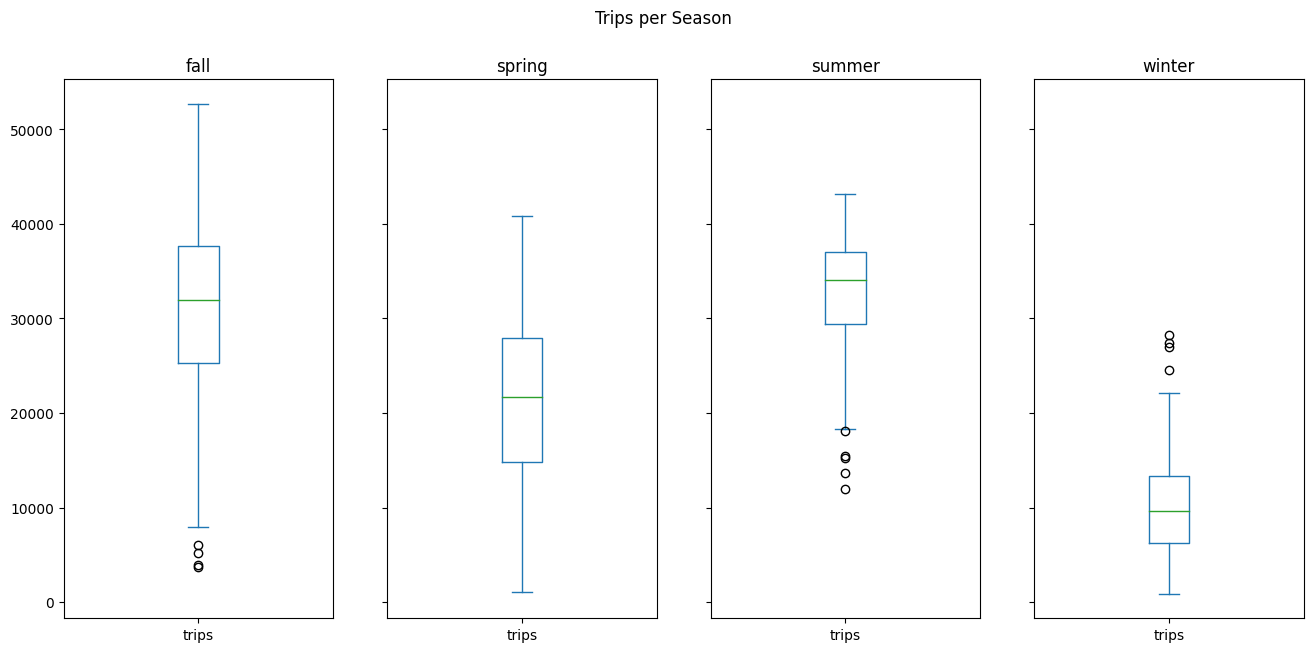

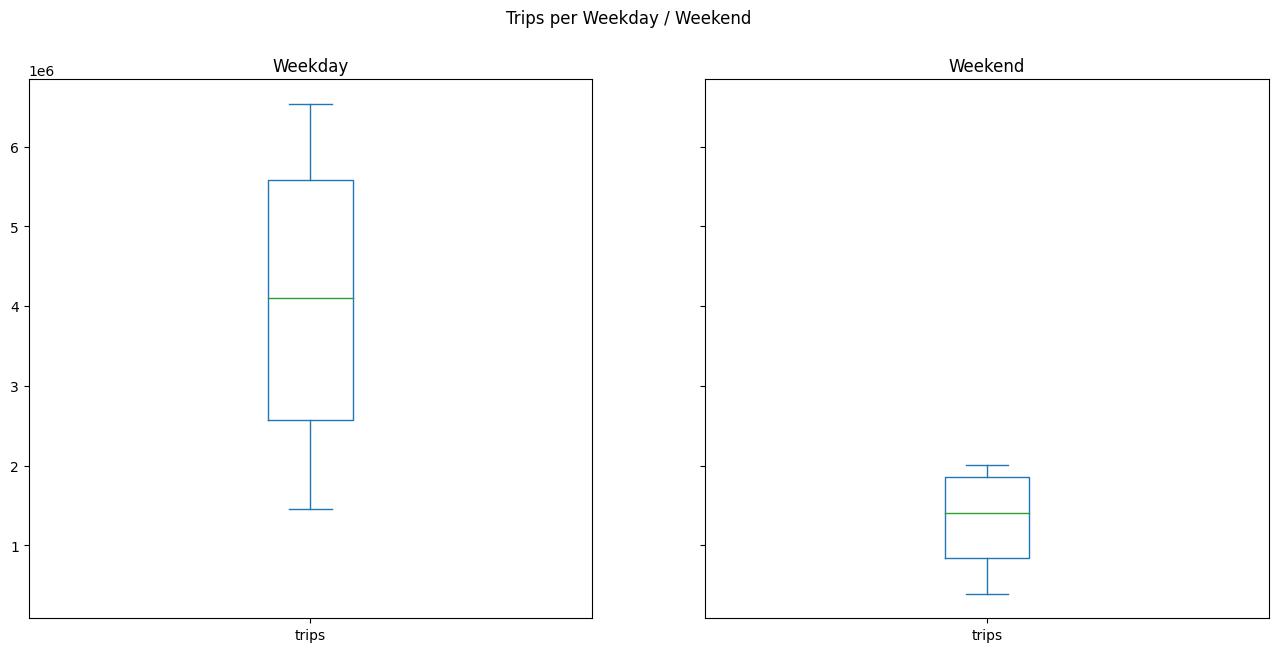

In [6]:
# Your code here

# fig, ax = plt.subplots(1, 3, figsize=(20,7), sharey=True)
# season_plot = bikes.groupby("season")["trips"].sum().plot(kind='box', title="Whole dataset", ax=ax[0])

season_plot = bikes.groupby("season")["trips"]
season_group = [season_plot.get_group(x) for x in season_plot.groups]

fig, ax = plt.subplots(1, 4, figsize=(16,7), sharey=True)
fig.suptitle("Trips per Season")
index = 0
for group, name in zip(season_group, season_plot.groups.keys()):
    group.plot(kind='box', title=name, ax=ax[index])
    index += 1

fig2, ax2 = plt.subplots(1, 2, figsize=(16,7), sharey=True)
fig2.suptitle("Trips per Weekday / Weekend")
weekday_plot = weekday.groupby("season")["trips"].sum().plot(kind='box', title="Weekday", ax=ax2[0])
weekend_plot = weekend.groupby("season")["trips"].sum().plot(kind='box', title="Weekend", ax=ax2[1])

**Answer**
As we can see from the plot above:
- The distribution of trips per season is difference from each other 
- The distribution of trips during the weekday are higher than those trips in the weekend.

### Part 2: Qualitative predictors (10 pts)

The Season variable is an example of what’s called a categorical predictor. In this part you will fit a model with a qualitative predictor and interpret the findings.

a) Using the weekdays dataset, fit a linear regression model with trips as the response variable and season as your predictor, and print the summary of this linear regression model. [2pt]


In [7]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

weekday["season"].unique()

array(['summer', 'fall', 'winter', 'spring'], dtype=object)

In [8]:
model = smf.ols(formula="trips ~ season", 
                data=weekday).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     261.4
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.07e-108
Time:                        21:58:45   Log-Likelihood:                -6333.7
No. Observations:                 608   AIC:                         1.268e+04
Df Residuals:                     604   BIC:                         1.269e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.353e+04    581.221  

b) How many total coefficients are there in the model? What does each coefficient correspond to? [1pt]

**Answer**

There are a total of 4 coefficients in the model as the summary stated above. We can see:

- Intercept        : 3.353e+04    
- season[T.spring] :-1.096e+04    
- season[T.summer] :  918.6325
- season[T.winter] :-2.231e+04

c) Interpret the coefficients of season in the model. Make sure to use an example in your interpretation, related to the bikes [2pt]

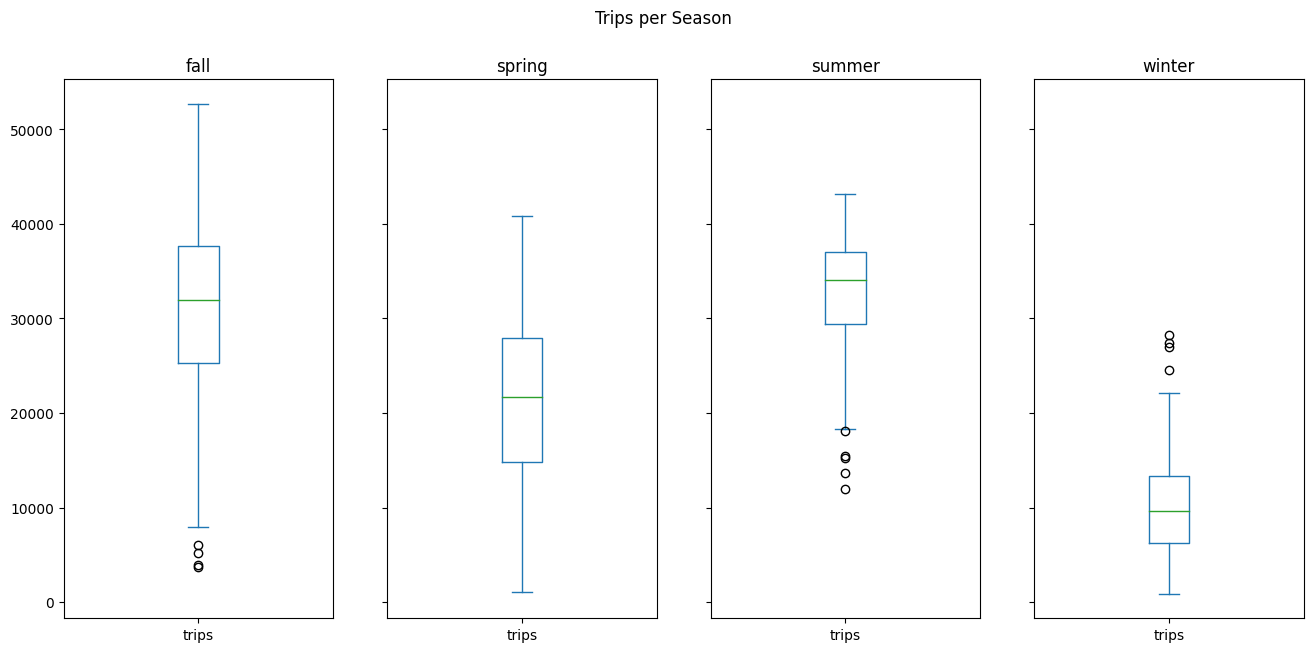

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(16,7), sharey=True)
fig.suptitle("Trips per Season")
index = 0
for group, name in zip(season_group, season_plot.groups.keys()):
    group.plot(kind='box', title=name, ax=ax[index])
    index += 1

**Answer**

In the model, the coefficients of spring and winter is negative, which makes the mean of the trips decrease. While the coefficients of summer, and the intercept, which is fall season, plus some bias, is positive. This means the mean number of trips during these 2 seasons increase. 

We can see from the boxplot above, the distribution of trips in the fall and summer is higher than spring and winter. 

d) Repeat a) -> c) with your weekends dataset. What difference can you see? [5pt]

In [10]:
# Your code here
# Weekend dataset
model = smf.ols(formula="trips ~ season", 
                data=weekend).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):           1.60e-43
Time:                        21:58:45   Log-Likelihood:                -2499.5
No. Observations:                 244   AIC:                             5007.
Df Residuals:                     240   BIC:                             5021.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.577e+04    776.459  

**Answer**

Similarly, we can see there are a total of 4 coefficients, 1 intercept, and 3 season variables, which are spring, winter, summer

### Part 3: Multiple linear regression (10 pts)

In this problem we’ll practice fitting and interpreting the results of a multiple linear regression. For this question use the weekdays dataset.

a) Fit a regression model with trips as the response variable and the following predictors as features: snow_depth, snowfall, min_temperature, max_temperature, precipitation, month [2pt]


In [11]:
# Your code here
model = smf.ols(formula="trips ~ precipitation + snow_depth + snowfall + max_temperature + min_temperature  + month", 
                data=bikes).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     392.9
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.63e-240
Time:                        21:58:45   Log-Likelihood:                -8643.2
No. Observations:                 852   AIC:                         1.730e+04
Df Residuals:                     845   BIC:                         1.733e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6155.0155   1091.183     

b) Interpret the coefficients of snow_depth, snowfall, min_temperature, max_temperature, precipitation, month in the model [2pt]

**Answer**

In the model above, the coefficeint Intercept, preciptation, snow_depth is negative, which will decrease the mean number of trips made by the rider. On the oposite, the temperture, month, and snowfall will increase the number of trips made by rider. 

c) Re-run the model from 3)a) but add another predictor of your choice. Justify your choice of predictor. Did this make any difference? Did the R-squared of the model improve? [2pt]

In [12]:
# Your code here
model = smf.ols(formula="trips ~ precipitation + snow_depth + snowfall + max_temperature + min_temperature + month + weekday", 
                data=bikes).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     432.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          4.62e-274
Time:                        21:58:45   Log-Likelihood:                -8562.0
No. Observations:                 852   AIC:                         1.714e+04
Df Residuals:                     844   BIC:                         1.718e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.044e+04   1043.368    -

**Answer**

In this formula, I add the variables weekdays to the formula, since we can see the distribution from the part 1 above, it is different, thus, it would make a good predictor for the model. 

As we can see from the summary, the $R_2$ increased, not that much. 

d) From c) which predictors are associated with increased ridership? Which predictors are associated with decreased ridership? [2pt]

**Answer**

- Increased ridership: weekday 
- Decresed ridership: precipitation

e) Which predictors are statistically significant (95% confidence level)? [2pt]

In [13]:
# model.params[np.where(model.pvalues > 0.95)]
np.where(model.pvalues > 0.95)

(array([], dtype=int64),)

**Answer**

From the summary above, the weekday, month, max_temperature, and snowfall are statiscially significant.

### Part 4: Dealing with collinearity (8 pts)

Highly correlated predictors can make interpreting regression coefficients problematic (they do not contribute relevant information for the model). Let’s evaluate this in our dataset. Continue using weekdays as your main dataset.

a) Check the variables used in Problem 3)a) to see if any of the predictors are highly correlated with one another. (Lab 7 may help you here) [2pt]


In [14]:
# your code here
feature_names = weekday[["precipitation", "snow_depth", "snowfall", "max_temperature", "min_temperature", "month"]]
feature_names.corr(method="pearson")

,precipitation,snow_depth,snowfall,max_temperature,min_temperature,month
precipitation,1.000000,0.022949,0.237246,-0.011895,0.013444,0.003059
snow_depth,0.022949,1.000000,0.261811,-0.475653,-0.493187,-0.439442
snowfall,0.237246,0.261811,1.000000,-0.232368,-0.237841,-0.215126
max_temperature,-0.011895,-0.475653,-0.232368,1.000000,0.968400,0.329866
min_temperature,0.013444,-0.493187,-0.237841,0.968400,1.000000,0.381236
month,0.003059,-0.439442,-0.215126,0.329866,0.381236,1.000000


**Answer**

As we can see, the min_temperature and max_temperature are highly correlates with each other.

b) Are any of the predictors highly correlated? Are you surprised that these predictors are highly correlated, or can you think of a reason for why it makes sense that they should be correlated? [2pt]

In [15]:
# Your code here
feature_names = weekday[["precipitation", "snow_depth", "snowfall", "max_temperature", "min_temperature", "month"]]
feature_names.corr(method="pearson")

,precipitation,snow_depth,snowfall,max_temperature,min_temperature,month
precipitation,1.000000,0.022949,0.237246,-0.011895,0.013444,0.003059
snow_depth,0.022949,1.000000,0.261811,-0.475653,-0.493187,-0.439442
snowfall,0.237246,0.261811,1.000000,-0.232368,-0.237841,-0.215126
max_temperature,-0.011895,-0.475653,-0.232368,1.000000,0.968400,0.329866
min_temperature,0.013444,-0.493187,-0.237841,0.968400,1.000000,0.381236
month,0.003059,-0.439442,-0.215126,0.329866,0.381236,1.000000



**Answer**

As we can see from the correlation table above, the min_temperature and the max_temperature are highly correlated: ~0.968. We are not surprised, since the max_temperature and min_temperature are independent variables from each other.

c) Fit your regression model, but this time omit the max or min temperature variable. Display the coefficients table for this model. [2pt]

In [16]:
# Your code here
# Omit the max_temperature
model = smf.ols(formula="trips ~ precipitation + snow_depth + min_temperature + snowfall + month", 
                data=weekday).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     336.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.30e-171
Time:                        21:58:46   Log-Likelihood:                -6181.4
No. Observations:                 608   AIC:                         1.237e+04
Df Residuals:                     602   BIC:                         1.240e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1616.5491   1002.779     

In [17]:
# Your code here
# Omit the min_temperature
model = smf.ols(formula="trips ~ precipitation + snow_depth + max_temperature + snowfall + month", 
                data=weekday).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  trips   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     399.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.80e-188
Time:                        21:58:46   Log-Likelihood:                -6142.1
No. Observations:                 608   AIC:                         1.230e+04
Df Residuals:                     602   BIC:                         1.232e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5144.3465   1081.924     

d) What is the coefficient of temperature in this new model? Is it very different from the temperature coefficient estimated in part 3)a)? Is it statistically significant? Explain your findings. [2pt]

**Answer**

For this estimation, I use the Max Temperature as one of the estimation of the regresison model. From the summary above, the coef is around 451, while in part 3a, it is 439, which is not a significant differernce. Thus, we can see that it is statistically insignificant. 

### Part 5: Exploring different models (20 pts)

*Continue using weekdays as your dataset.*

a) Construct a scatterplot of trips ~ month. Describe what you see. Does a linear relationship appear to be a good way of modeling how bikeshare count varies with month? [2pts]

<AxesSubplot:xlabel='month', ylabel='trips'>

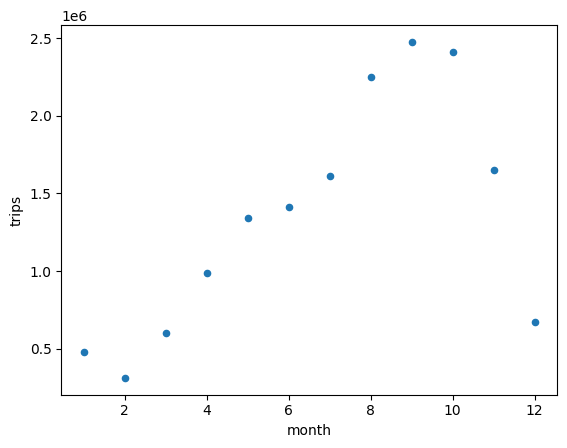

In [18]:
# Your code here
dataset_series = weekday.groupby("month")["trips"].sum()

# Create a Dataframe based on the trips ~ month
dataset = pd.DataFrame({"month":dataset_series.index, 
                        "trips":dataset_series.values})
                        
dataset.plot(kind='scatter', x="month", y="trips")

**Answer**

From the scatter plot above, a linear relationship would not be a good way of modeling.

b) Try out 3 different degrees of polynomial regression fits for modeling the relationship between trips and month. Do not do more than 3 models. Display all of them in the same plot (through subplots). Choose the subplot that appears to nicely capture the trends in the data. Be sure to print the $R^2$ or adjusted-$R^2$ for each subplot to help you with your decision. Explain your choice and include comments to explain your code. [4pts]

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

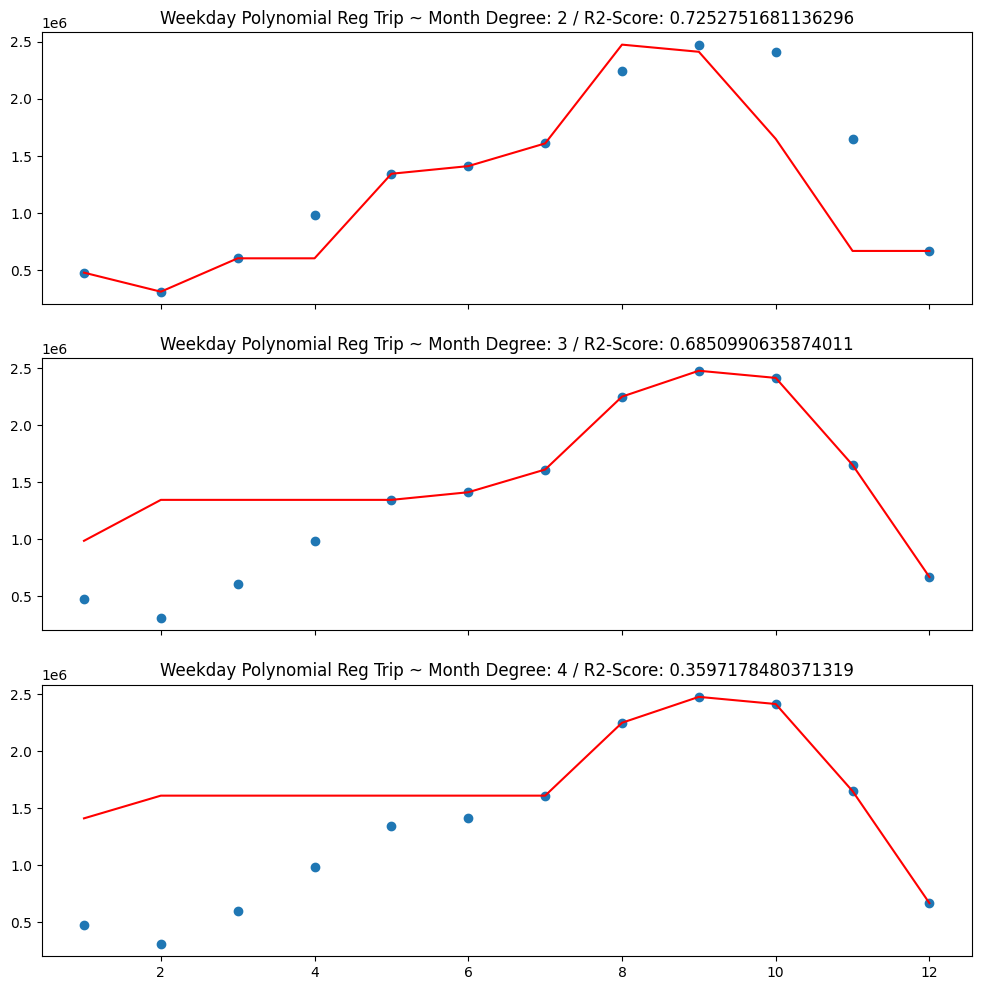

In [20]:
# Your code here
# You can add more cells if you need them
X = np.array(dataset["month"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degrees
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekday Polynomial Reg Trip ~ Month Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

**Answer** 

From the plot above, we can see that with the degree of 2, the Polynomial Regression can capture the trend of the data most correctly, with the highest $R_2$ score of 0.72

c) Repeat b) to determine appropriate degree polynomials for modeling the relationship between trip and the other inputs: temperature (pick one), snow (also pick one) and precipitation (i.e., trips ~ temperature, trips ~ snow, and trips ~precipitation). Justify your choices and include comment on your code. (Note: your polynomials can have different degrees for different features) [7pts]


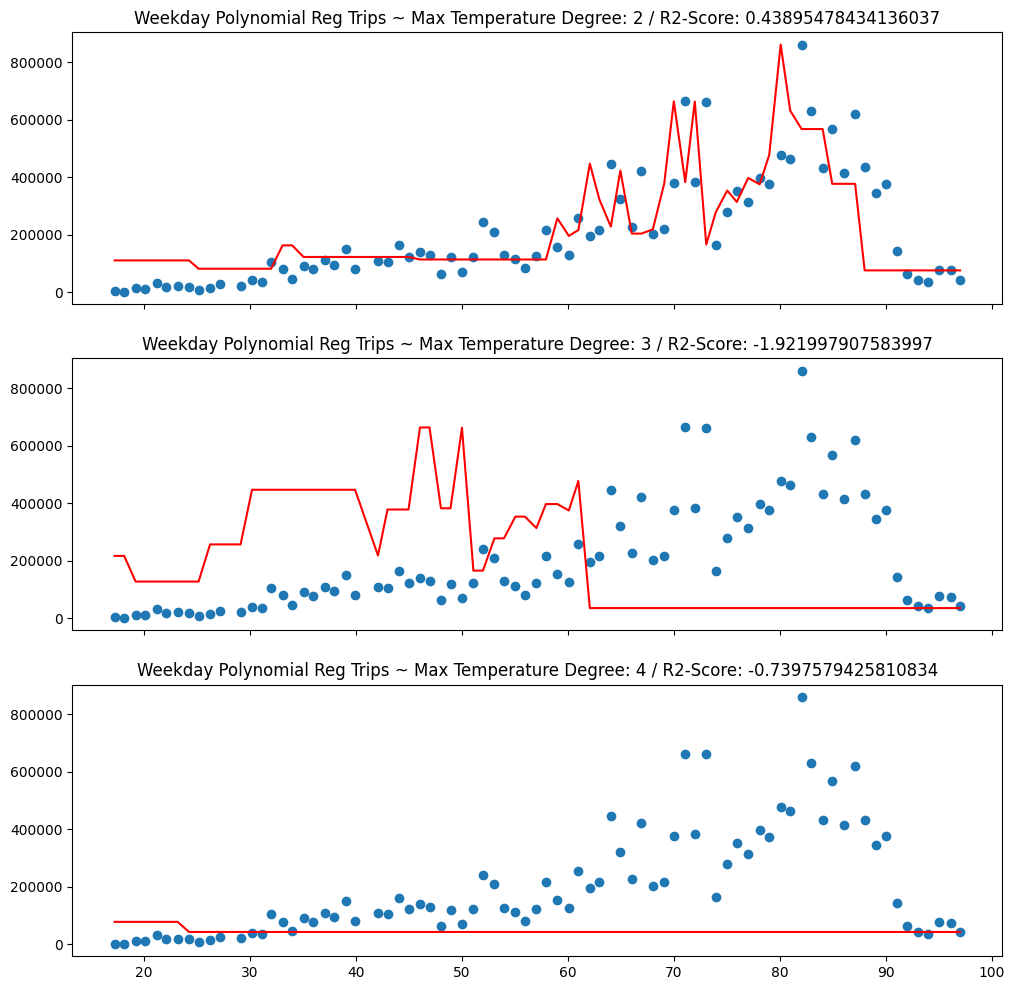

In [21]:
# Temperature

# Your code here
dataset_series = weekday.groupby("max_temperature")["trips"].sum()

# Create a Dataframe based on the trips ~ max_temperature
dataset = pd.DataFrame({"max_temperature": dataset_series.index, 
                        "trips": dataset_series.values})


X = np.array(dataset["max_temperature"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degree
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekday Polynomial Reg Trips ~ Max Temperature Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

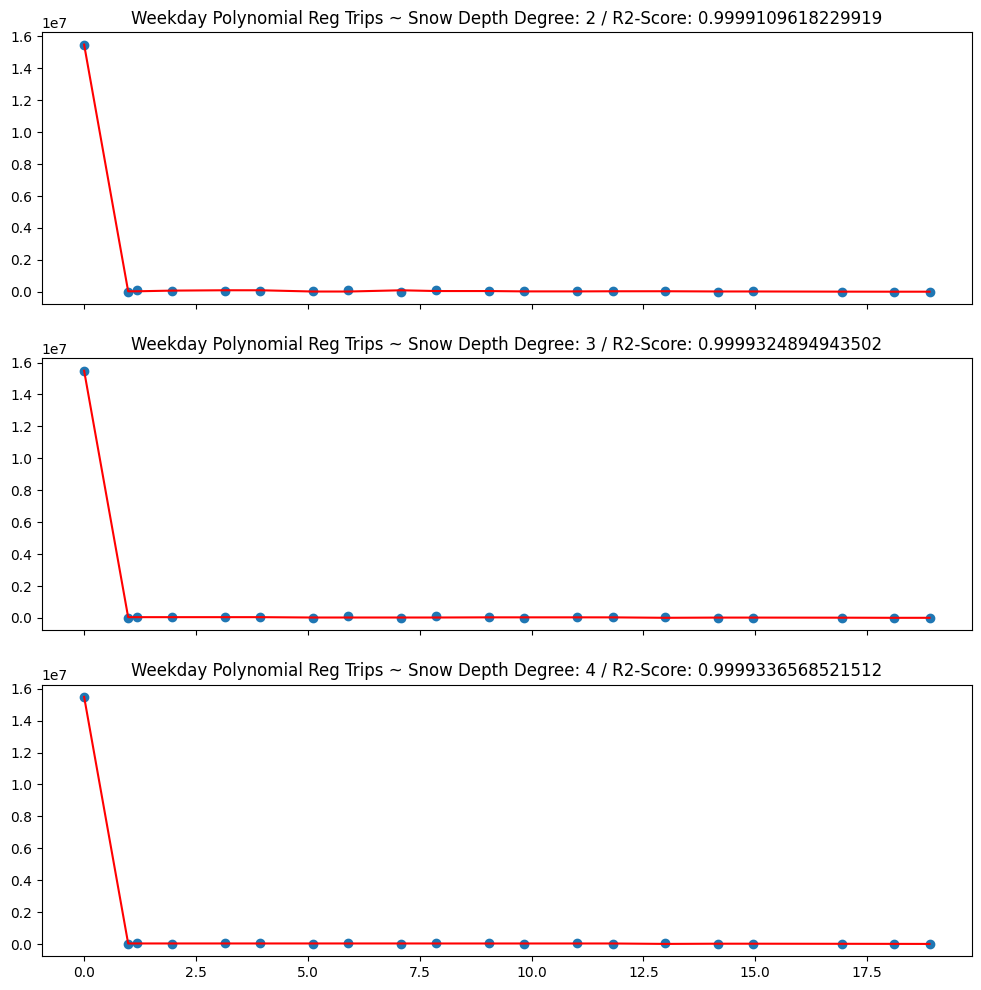

In [22]:
# Snow

# Your code here
dataset_series = weekday.groupby("snow_depth")["trips"].sum()

# Create a Dataframe based on the trips ~ max_temperature
dataset = pd.DataFrame({"snow_depth":dataset_series.index, 
                        "trips":dataset_series.values})


X = np.array(dataset["snow_depth"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degree
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekday Polynomial Reg Trips ~ Snow Depth Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

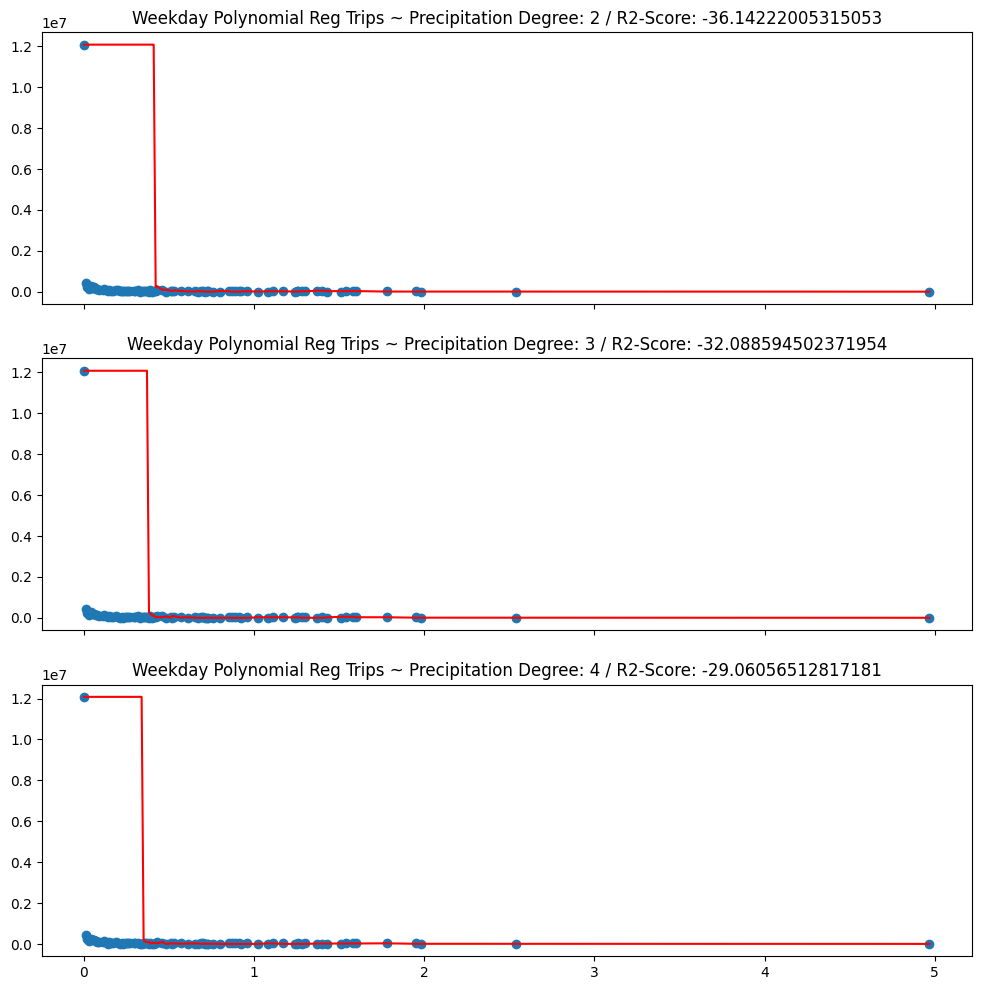

In [23]:
# Precipitation
# Your code here
dataset_series = weekday.groupby("precipitation")["trips"].sum()

# Create a Dataframe based on the trips ~ max_temperature
dataset = pd.DataFrame({"precipitation":dataset_series.index, 
                        "trips":dataset_series.values})


X = np.array(dataset["precipitation"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degree
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekday Polynomial Reg Trips ~ Precipitation Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

**Answer**

In the weekday dataset, we can notice a few trend:

- Regarding the Temperature, we can see that with degree 2, the Polynomial Regression can capture the most accurate trend of the data Trip ~ Temperature
- Regarding the Snow, we can see that with any of the degree, the Polynomical Regression can capture the trend of the data Trip ~ Snow Depth, so we can choose any degree from the list 2, 3, 4
- Regarding the Precipitation, we can see that Polynomial Regression cannot capture the trend correctly of the data, since the $R_2$ score is negative. However, we can choose the degree with the $R_2$ score closest to 0, which is degree 4

d) Repeat 5)c) with the weekends dataset. Do you notice any differences? Justify your choices and include comment on your code. [7pts]

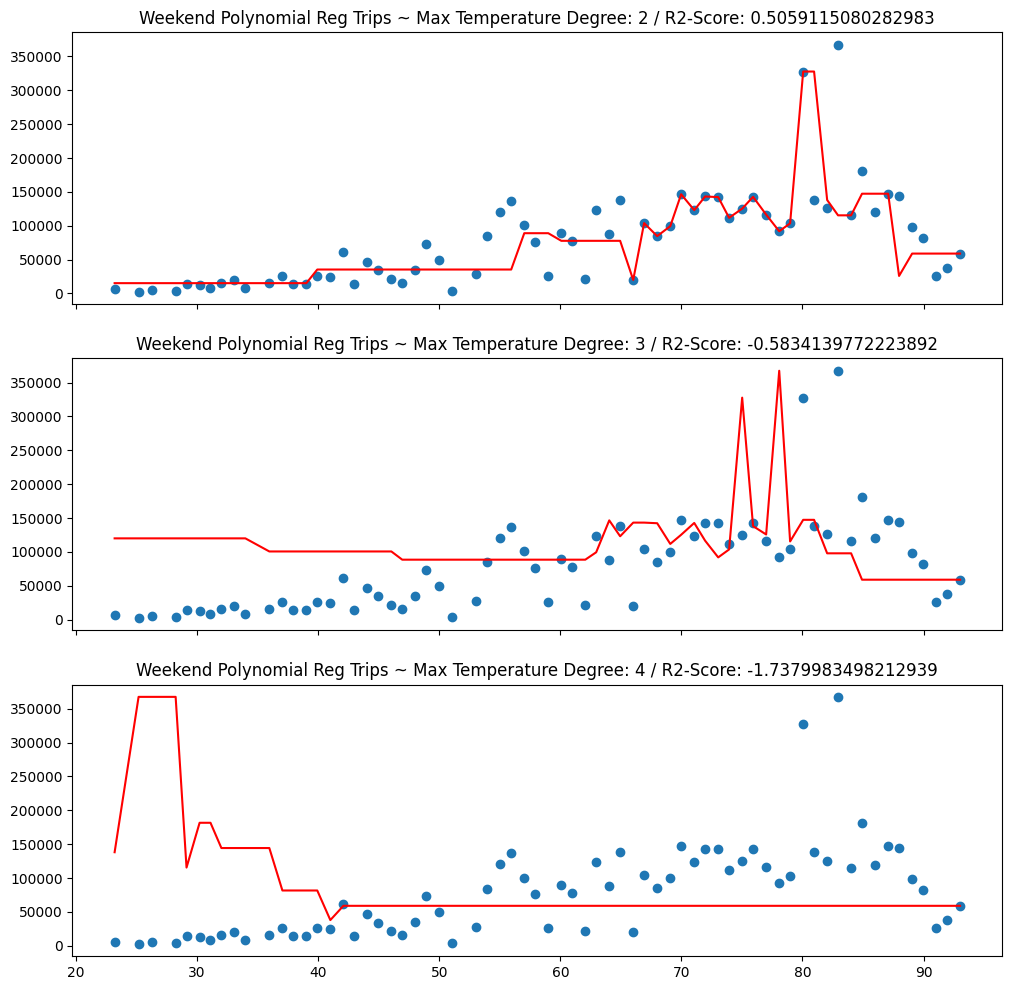

In [24]:
# Temperature

# Your code here
dataset_series = weekend.groupby("max_temperature")["trips"].sum()

# Create a Dataframe based on the trips ~ max_temperature
dataset = pd.DataFrame({"max_temperature":dataset_series.index, 
                        "trips":dataset_series.values})


X = np.array(dataset["max_temperature"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degree
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekend Polynomial Reg Trips ~ Max Temperature Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

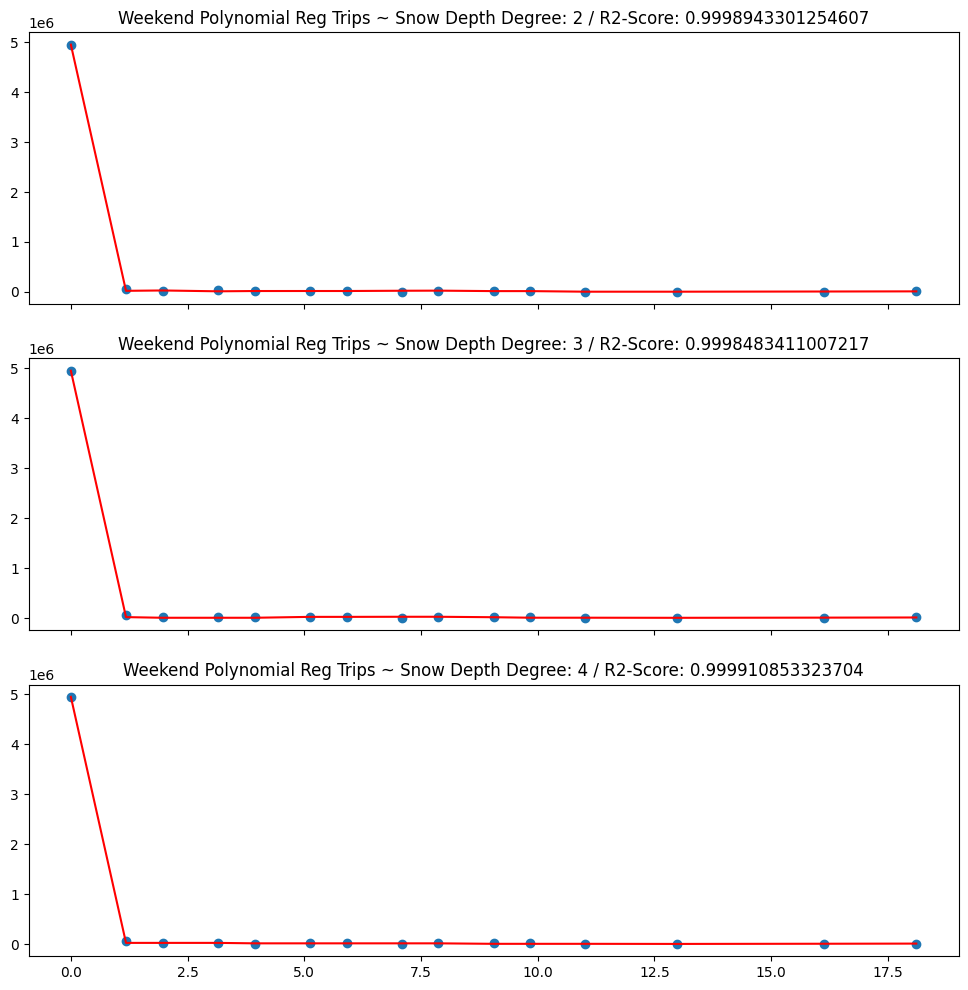

In [25]:
# Snow

# Your code here
dataset_series = weekend.groupby("snow_depth")["trips"].sum()

# Create a Dataframe based on the trips ~ max_temperature
dataset = pd.DataFrame({"snow_depth":dataset_series.index, 
                        "trips":dataset_series.values})


X = np.array(dataset["snow_depth"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degree
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekend Polynomial Reg Trips ~ Snow Depth Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

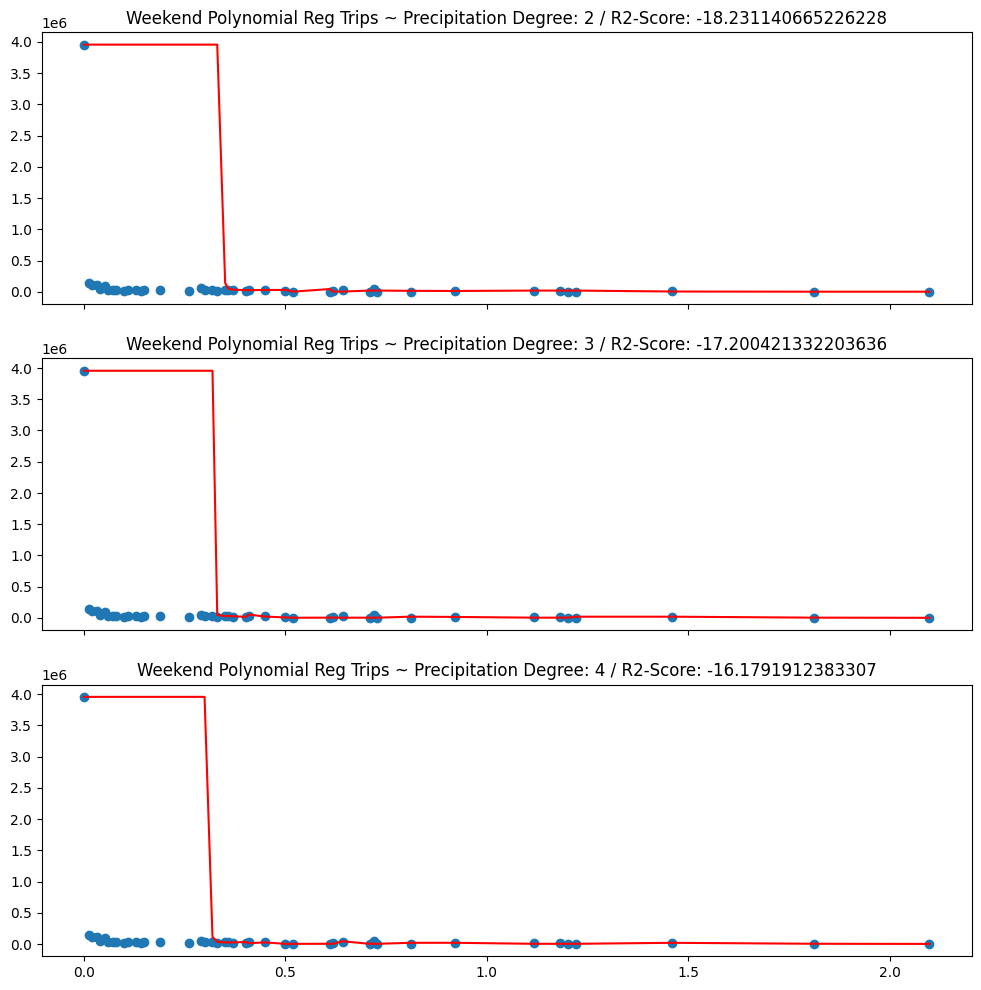

In [26]:
# Precipitation
# Your code here
dataset_series = weekend.groupby("precipitation")["trips"].sum()

# Create a Dataframe based on the trips ~ max_temperature
dataset = pd.DataFrame({"precipitation":dataset_series.index, 
                        "trips":dataset_series.values})


X = np.array(dataset["precipitation"]).reshape(-1,1)
y = dataset["trips"]

# Try 3 polynomial degree
degree_arr = [2, 3, 4]
# Save the model in a dicitonary
model_dict = {}

for degree in degree_arr:
    poly = PolynomialFeatures(degree=degree)
    lr = LogisticRegression()
    model = make_pipeline(poly, lr)

    model.fit(X, y)
    y_pred = model.predict(X)
    score = r2_score(y, y_pred)

    # Save the prediction and r2 score in the model degree dictionary 
    model_dict[degree] = [y_pred, score]

fig, ax = plt.subplots(len(degree_arr), 
                        sharex=True, 
                        sharey=True,
                        figsize=(12,12))

# Loop through every degree in the model dictionary
index = 0
for degree in model_dict:
    ax[index].scatter(X, y)
    ax[index].plot(X, model_dict[degree][0], color='r')
    ax[index].set_title(f"Weekend Polynomial Reg Trips ~ Precipitation Degree: {degree} / R2-Score: {model_dict[degree][1]}")
    index += 1

**Answer**

In the weekend dataset, we can notice a few trend:

- Regarding the Temperature, we can also see that with degree 2, the Polynomial Regression can capture the most accurate trend of the data Trip ~ Temperature
- Regarding the Snow, we can also see that with any of the degree, the Polynomical Regression can capture the trend of the data Trip ~ Snow Depth, so we can choose any degree from the list 2, 3, 4
- Regarding the Precipitation, we can also see that Polynomial Regression cannot capture the trend correctly of the data, since the $R_2$ score is negative. However, we can choose the degree with the $R_2$ score closest to 0, which is degree 4

## Exercise 2 (45pts)

In this exercise we will implement a Natural Language Processing (NLP) system using binary logistic regression.

The data you will be working with comes from the [Yelp Dataset](https://www.yelp.com/dataset). Each line is a review that consists of a label (0 for negative reviews and 1 for positive reviews) and a set of words.

```
1 i will never forget this single breakfast experience in mad...
0 the search for decent chinese takeout in madison continues ...
0 sorry but me julio fell way below the standard even for med...
1 so this is the kind of food that will kill you so there s t...
```

In order to transform the set of words into vectors, we will rely on a method of feature engineering called word embeddings. Rather than simply indicating which words are present, word embeddings represent each word by "embedding" it in a low-dimensional vector space which may carry more information about the semantic meaning of the word. (for example in this space, the words "King" and "Queen" would be close).

`word2vec.txt` contains the `word2vec` embeddings for about 15 thousand words. Not every word in each review is present in the provided `word2vec.txt` file. We can treat these words as being "out of vocabulary" and ignore them.

### Example

Let x_i denote the sentence `“a hot dog is not a sandwich because it is not square”` and let a toy word2vec dictionary be as follows:

```
hot      0.1     0.2     0.3
not      -0.1    0.2     -0.3
sandwich 0.0     -0.2    0.4
square   0.2     -0.1    0.5
```

we would first `trim` the sentence to only contain words in our vocabulary: `"hot not sandwich not square”` then embed x_i into the feature space:

$$ φ2(x_i)) = \frac{1}{5} (word2vec(\text{hot}) + 2 · word2vec(\text{not}) + word2vec(\text{sandwich}) + word2vec(\text{square})) = \left[0.02 \hspace{2mm} 0.06 \hspace{2mm} 0.12 \hspace{2mm}\right]^T $$

### Part 1 (20pts)

a) Implement a function to trim out-of-vocabulary words from the reviews. Your function should return an nd array of the same dimension and dtype as the original loaded dataset. (10pts)

In [27]:
import csv
import numpy as np
import string

VECTOR_LEN = 300   # Length of word2vec vector
MAX_WORD_LEN = 64  # Max word length in dict.txt and word2vec.txt

################################################################################
# We have provided you the functions for loading the tsv and txt files. Feel   #
# free to use them! No need to change them at all.                             #
################################################################################


def load_tsv_dataset(file):
    """
    Loads raw data and returns a tuple containing the reviews and their ratings.

    Parameters:
        file (str): File path to the dataset tsv file.

    Returns:
        An np.ndarray of shape N. N is the number of data points in the tsv file.
        Each element dataset[i] is a tuple (label, review), where the label is
        an integer (0 or 1) and the review is a string.
    """
    dataset = np.loadtxt(file, delimiter='\t', comments=None, encoding='utf-8',
                         dtype='l,O')
    return dataset


def load_feature_dictionary(file):
    """
    Creates a map of words to vectors using the file that has the word2vec
    embeddings.

    Parameters:
        file (str): File path to the word2vec embedding file.

    Returns:
        A dictionary indexed by words, returning the corresponding word2vec
        embedding np.ndarray.
    """
    word2vec_map = dict()
    with open(file) as f:
        read_file = csv.reader(f, delimiter='\t')
        for row in read_file:
            word, embedding = row[0], row[1:]
            word2vec_map[word] = np.array(embedding, dtype=float)
    return word2vec_map


def trim_reviews(path_to_dataset):
    # Read the dataset
    dataset = load_tsv_dataset(path_to_dataset)
    # Read the word dictionary
    word_dict = load_feature_dictionary("./data/word2vec.txt")

    trimmed_reviews = []

    for result, review in dataset:
        new_string = []
        for word in review.split(" "):
            if word in word_dict.keys():
                new_string.append(word)

        new_arr = (result, " ".join(new_string))
        trimmed_reviews.append(new_arr)

    
    # Check for the same shape
    assert np.array(trimmed_reviews).shape[0] == dataset.shape[0]
    print("Trimmed Dataset")
    print(trimmed_reviews[0])
    print()
    
    print("Original Dataset")
    print(dataset[0])
    print()

    return trimmed_reviews

print("Trim Traim")
trim_train = trim_reviews("./data/train_small.tsv")
print("Trim Test")
trim_test = trim_reviews("./data/test_small.tsv")

Trim Traim
Trimmed Dataset
(1, 'i will never forget this single breakfast experience in madison it was awesome yes it is crowded and you have to sit with other groups at the large tables yes you have to pay cash yes it seems like you are eating breakfast in your grandmother s kitchen but seriously i like my grandmother s kitchen it is quite the experience and totally worth the perceived the coffee was fresh and dark the chocolate was to die for and the fruit covered french toast made from was sinful if i ever find myself in madison again i will definitely go out of my way to return to this little gem of a breakfast')

Original Dataset
(1, 'i will never forget this single breakfast experience in madison it was awesome yes it is crowded and you have to sit with other groups at the large tables yes you have to pay cash yes it seems like you are eating breakfast in your grandmother s kitchen but seriously i like my grandmother s kitchen it is quite the experience and totally worth the perc

b) Implement the embedding and store it to a `.tsv` file where the first column is the label and the rest are the features from the embedding. Round all numbers to 6 decimal places. `embedded_train_small.tsv` and `embedded_test_small.tsv` contain the expected output of your function. (10pts)

In [28]:
def embed_reviews(trimmed_dataset):
    word_dict = load_feature_dictionary("./data/word2vec.txt")

    embedded_dataset = []
    for result, review in trimmed_dataset:
        # Get the shape of the first value in word_dict
        temp =  list(word_dict.values())[0]
        # Create an empty array with the shape
        res = np.zeros((temp.shape[0],))
        
        # Calculate the embedded word
        for word in review.split(" "): 
            res += word_dict[word]
        
        res = 1 / len(review.split(" ")) * res

        # Format the embedded dataset
        str_res = ["{:.6f}".format(elem) for elem in res]
        embedded_dataset.append("{:.6f}".format(result) + "\t" + "\t".join(str_res) + "\n")

    # Return embedded dataset
    return embedded_dataset

def save_as_tsv(dataset, filename):
    with open(filename, 'w+') as f:
        f.writelines(dataset)
    return

embedded_train = embed_reviews(trim_train)
embedded_test = embed_reviews(trim_test)

save_as_tsv(embedded_train, "./data/embedded_train_small.tsv")
save_as_tsv(embedded_test, "./data/embedded_test_small.tsv")


### Part 2 (25pts)

In this part we'll be implementing Stochastic Gradient Descent for binary Logistic Regression Classifier.

Some rules:

1. Include an intercept term in your model. You must consider the bias term as part of the weight vector and not a separate term to keep track of.
2. Initialize all model parameters to 0
3. Use vector and matrix multiplication
4. Do not shuffle the data

The expected `metrics.txt` from the dataset with `500` epochs and `0.001` learning rate is:

```
error(train): 0.000000
error(test): 0.625000
```

We will be testing your code on other, larger datasets.

In [29]:
import numpy as np

def load_tsv_dataset(file):
    return np.loadtxt(file, delimiter='\t', encoding='utf-8')


def sigmoid(x):
    e = np.exp(x)
    return e / (1 + e)


def sgd(theta, X, Y, learning_rate):
    # TODO: implement in vector form    
    theta = theta.reshape((-1,1))
    y_pred = sigmoid(np.dot(X, theta))
    gradient_theta = np.mean((y_pred - Y)*X, axis=0)[:,None]
    theta -= learning_rate * gradient_theta

    return theta


def train(theta, X, y, num_epoch, learning_rate, batch_size):
    for _ in range(num_epoch):
        # SGD
        for i in range(0, X.shape[0], batch_size):
            j = i + batch_size
            X_batch = X[i:j]
            y_batch = y[i:j]
            theta = sgd(theta, X_batch, y_batch, learning_rate)

    return theta


def predict(theta, X):
    # TODO: implement in vector form
    theta = theta.reshape(-1,1)
    prob = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in prob]

def compute_error(y_pred, y):
    # TODO: implement in vector form
    return np.sum(np.square(y.ravel() - y_pred)) / len(y_pred)


def write_metrics(train_err, test_err, metrics_out):
    with open(metrics_out, 'w+') as f:
        w = "error(train): " + "{:.6f}".format(train_err) + "\n"
        w += "error(test): " + "{:.6f}".format(test_err) + "\n"
        f.write(w)
    return


def logistic_reg(formatted_train, formatted_test, metrics_out, num_epochs, learning_rate, batch_size):
    train_data = pd.DataFrame(load_tsv_dataset(formatted_train))
    test_data = pd.DataFrame(load_tsv_dataset(formatted_test))

    X = np.array(train_data.iloc[:, 1:])
    y = np.array(train_data.iloc[:, :1])

    bias = np.array([0]*X.shape[0]).reshape(X.shape[0], 1)
    print(bias.shape)
    X = np.append(X, bias, axis=1)
    print("X train shape =", X.shape)
    print("y train shape =", y.shape)

    theta = np.zeros((X.shape[1], 1))
    print(theta.shape)

    learned_theta = train(theta, X, y, num_epochs, learning_rate, batch_size)
    train_pred = predict(learned_theta, X)
    train_err = compute_error(train_pred, y)

    print(learned_theta.shape)

    X_test = np.array(test_data.iloc[:, 1:])
    y_test = np.array(test_data.iloc[:, :1])

    bias = np.array([0]*X_test.shape[0]).reshape(X_test.shape[0], 1)
    X_test = np.append(X_test, bias, axis=1)
    
    print("X test shape =", X_test.shape)


    test_pred = predict(learned_theta, X_test)
    print(test_pred)
    test_err = compute_error(test_pred, y_test)
    print(y_test.ravel())
    print(y_test.ravel() - test_pred)

    write_metrics(train_err, test_err, metrics_out)
    return


logistic_reg("./data/embedded_train_small.tsv", "./data/embedded_test_small.tsv", "./data/metrics.txt", 500, 0.001, 1)

(20, 1)
X train shape = (20, 301)
y train shape = (20, 1)
(301, 1)
(301, 1)
X test shape = (8, 301)
[1, 1, 0, 0, 0, 1, 0, 0]
[0. 0. 1. 1. 0. 1. 1. 0.]
[-1. -1.  1.  1.  0.  0.  1.  0.]
